# DECISION TREE CLASSIFICATION

The algorithm is explained in the cell where the actual model is defined. Check it out.

In the CART (Classification and Regression Trees) algorithm, Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. The weighted Gini impurity is used to evaluate the quality of a split by combining the Gini impurities of the child nodes, weighted by the proportion of samples in each node.

### 1. **Gini Impurity**:

For a node $t$ with a set of samples, the Gini impurity $G(t)$ is calculated as:

$
G(t) = 1 - \sum_{i=1}^{C} p_i^2
$

Where:
- $C$ is the number of classes.
- $p_i$ is the proportion of samples belonging to class $i$ in the node.

### 2. **Weighted Gini Impurity**:

When splitting a node into two child nodes, the weighted Gini impurity $G_{\text{split}}$ is calculated as the sum of the Gini impurities of the left child node $G(t_L)$ and the right child node $G(t_R)$, weighted by the proportion of samples that fall into each node:

$
G_{\text{split}} = \frac{n_L}{n} \cdot G(t_L) + \frac{n_R}{n} \cdot G(t_R)
$

Where:
- $n_L$ is the number of samples in the left child node.
- $n_R$ is the number of samples in the right child node.
- $n$ is the total number of samples in the parent node ($n = n_L + n_R$).
- $G(t_L)$ and $G(t_R)$ are the Gini impurities of the left and right child nodes, respectively.

### Summary of Formulas:

1. **Gini Impurity**:
   $
   G(t) = 1 - \sum_{i=1}^{C} p_i^2
   $

2. **Weighted Gini Impurity for a Split**:
   $
   G_{\text{split}} = \frac{n_L}{n} \cdot G(t_L) + \frac{n_R}{n} \cdot G(t_R)
   $

These formulas are used in the CART algorithm to evaluate and select the best possible split at each node during the construction of a decision tree. The split that minimizes the weighted Gini impurity is chosen as the optimal split.

In [44]:
# IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate
from AI.algorithms_from_scratch.data_plotting import Plots
from sklearn.base import BaseEstimator, ClassifierMixin

In [45]:

# IMPORT DATASET
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

In [46]:
# SCALING - NOT NEEDED IN DECISION TREES

In [47]:
# SPLIT DATASET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

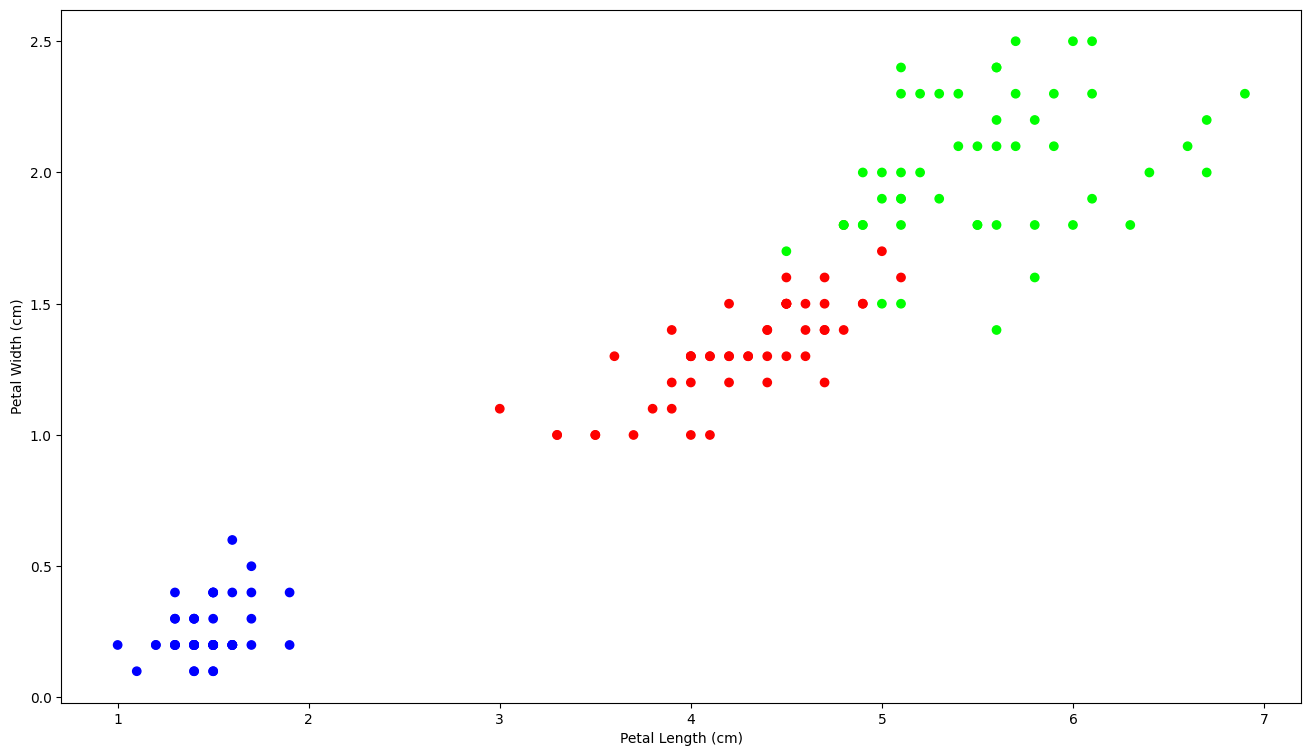

In [48]:
# PLOT DATASET
plt.figure(figsize=(16, 9))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

In [49]:

# TODO: Only for learning and debugging purposes 
# X = np.array([
#     [10, 20, 1000],
#     [30, 40, 1001],
#     [50, 60, 2000],
#     [70, 80, 2001],
#     [90, 100, 3000],
#     [110, 120, 3001]
# ])
# y = np.array(
#     [
#         0,
#         0,
#         1,
#         1,
#         2,
#         2
#     ])
# --------------------------------------------------------------------------------

# HOW THE DECISION TREE WORKS IN THIS EXAMPLE IN MY OWN WORDS:
# The decision tree relies on recursion. The training is based on
# finding the best split only at a one feature_column (dimension) at a time. This means that at first
# the algorithm will separate all data points from the whole dataset at feature_0 into one vector.
# Meaning we start an iteration over the feature columns (I will call them feature vectors,
# but in vertical axis, instead of horizontal).
# Then this feature_vector is also used to create a new vector that is going to contain only unique values,
# which will serve as thresholds based on which are compared the data in the feature_vector.
# Note that the threshold_vector must be sorted in order to be able systematically compare
# the data in feature_vector. (Sorted from smallest to largest)
# The data from the feature_vector which are smaller or equal to current item from threshold_vector
# are saved into left_indices, and the data which are greater than threshold are saved into right_indices.
# By those indexes we can then separate the data from X and y into left and right data, and calculate the gini impurity.
# The iterations continue over all feature columns and all thresholds, there are no break conditions. 
# (There are of course stopping conditions, but not in these two loops, they are rather to stop the recursion)
# The quality of each split (based on each threshold) is computed in the _weighted_gini_impurity method. If
# the algorithm is able to find the best split (meaning either all data in a given feature_vector split 
# belong to the same labels = it is pure = will become a leaf node, or at least the gini score is the smallest yet),
# the results are saved into temp variables. Once done with all the iterations over all the
# feature_vectors and all the thresholds (for each feature vector), 
# the algorithm will create two nodes.
# 
# Example of node creation.
# Let's say that at the root node the algorithm found that at left side of threshold the data are pure,
# and on the right side of the threshold the data are not pure. The algorith has stopping conditions set
# to max_depth = 2.
# The algorithm will create a left leaf node, into which it saves the most common label. 
# The right node will be created as well, and it will contain remaining portion of data which are not pure.
# We are at the depth 1. But before the root node gets assigned all parameters, we need to go deeper into the
# right node and perform another split. The right node will be treated as a parent node, and the process
# will be repeated. The algorithm will find the best split, create two nodes, reaching depth 2. 
# Therefore, we are going to save into the most top node (root node), 
# feature index (the feature_column at which the model found the smallest gini), the threshold (
# based on which the model will compare the unseen data), left node (that is the one into which
# the model saved the most common label as mentioned earlier) and right node (that is the one
# which itself is a parent node and contains params like threshold, etc... also contains 
# two nodes, left and right).

# For remainder about thresholds:
# During training the comparison vs threshold is to get relevant indexes/datapoints
# of 'X' array (therefore also corresponding indexes of 'y' array) for computation of gini impurity.
# During prediction the thresholds are actually used to find the correct node in the tree.

# For remainder about the branching:
# Branching can continue (from the perspective of root node) on both left and right side.
# The leaf node is created in following conditions (just a few examples):
# - If the depth of the tree is reached
# - If the number of samples in the node is less than the minimum required for splitting
# - If the node contains only one class
# - ...



class MyDecisionTreeClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, min_samples_split: int = 2, max_depth: int = 10):
        """
        Initialize the MyDecisionTreeClassifier with specified parameters.

        :param min_samples_split: The minimum number of samples required to split an internal node.
        :param max_depth: The maximum depth of the tree. (Levels of nodes)
        """
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree: 'MyDecisionTreeClassifier.Node' = None

    class Node:
        """
        A class representing a single node in the decision tree.

        :param feature_column_index: The index of the feature column used for splitting at this node.
        :param threshold: The threshold value used to split the feature at this node.
        :param left: The left child node.
        :param right: The right child node.
        :param most_common_label: The class label if the node is a leaf, otherwise None.
        """

        def __init__(self,
                     feature_column_index: int = None,
                     threshold: float = None,
                     left: 'MyDecisionTreeClassifier.Node' = None,
                     right: 'MyDecisionTreeClassifier.Node' = None,
                     most_common_label: int = None):
            self.feature_column_index = feature_column_index
            self.threshold = threshold
            self.left = left
            self.right = right
            self.most_common_label = most_common_label

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Fit the decision tree classifier on the training data.

        :param X: The training input samples.
        :param y: The target values (class labels).
        :return: Fitted estimator.
        """
        self.tree = self._grow_tree(X, y)
        return self

    def predict(self, X: np.ndarray):
        """
        Predict class labels for samples in X.

        :param X: The input samples.
        :return: The predicted class labels.
        """
        return np.array([self._predict_input(x, self.tree) for x in X])

    def _grow_tree(self, X: np.ndarray, y: np.ndarray, depth: int = 0):
        """
        Recursively grow the decision tree.

        :param X: The input samples.
        :param y: The target values (class labels).
        :param depth: The current depth of the tree.
        :return: The root node of the decision tree.
        """
        nr_samples, nr_features = X.shape
        nr_unique_labels = len(np.unique(y))

        # Stopping conditions
        if (depth >= self.max_depth
                or nr_unique_labels == 1
                or nr_samples < self.min_samples_split):
            most_common_label = self._most_common_label(y)
            return self.Node(most_common_label=most_common_label)

        # Find the best split
        best_weighted_gini = 1
        best_feature_column_index = None
        best_threshold = None

        for feature_column_index in range(nr_features):
            feature_column = X[:, feature_column_index]
            thresholds = np.unique(feature_column)
            for threshold in thresholds:
                weighted_gini = self._weighted_gini_impurity(feature_column, y, threshold)
                if weighted_gini < best_weighted_gini:
                    best_weighted_gini = weighted_gini
                    best_feature_column_index = feature_column_index
                    best_threshold = threshold

        if best_weighted_gini == 1:
            most_common_label = self._most_common_label(y)
            return self.Node(most_common_label=most_common_label)

        # Grow the children
        left_indices = X[:, best_feature_column_index] <= best_threshold
        right_indices = X[:, best_feature_column_index] > best_threshold
        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return self.Node(best_feature_column_index, best_threshold,
                         left_subtree, right_subtree)

    def _weighted_gini_impurity(self, feature_column: np.ndarray, y: np.ndarray, threshold: float):
        """
        Calculate the weighted Gini impurity for a potential split.

        :param feature_column: The feature values for the samples.
        :param y: The target values (class labels).
        :param threshold: The threshold value to split the feature.
        :return: The weighted Gini impurity for the split.
        """
        left_indices = feature_column <= threshold
        right_indices = feature_column > threshold

        if len(left_indices) == 0 or len(right_indices) == 0:
            return 1

        left_gini_impurity = self._gini_impurity(y[left_indices])
        right_gini_impurity = self._gini_impurity(y[right_indices])
        left_weight = len(y[left_indices]) / len(y)
        right_weight = len(y[right_indices]) / len(y)
        return left_weight * left_gini_impurity + right_weight * right_gini_impurity

    def _gini_impurity(self, y_split: np.ndarray):
        """
        Calculate the Gini impurity for a set of labels.

        :param y_split: The target values (class labels), which are inputted here either as a left or right split.
        :return: The Gini impurity.
        """
        m = len(y_split)
        if m == 0:
            return 1
        class_counts = np.bincount(y_split)  # np.bincount - Explained on the bottom of this cell.
        probabilities = class_counts / m
        return 1 - np.sum(probabilities ** 2)

    def _most_common_label(self, y: np.ndarray):
        """
        Determine the most common label in a set of labels.

        :param y: The target values (class labels).
        :return: The most common class label.
        """
        return int(np.bincount(y).argmax())

    def _predict_input(self, x: np.ndarray, node: 'MyDecisionTreeClassifier.Node'):
        """
        Predict the class label for a single input using the trained tree.

        :param x: The input sample.
        :param node: The current node in the decision tree.
        :return: The predicted class label for the input sample.
        """
        if node.most_common_label is not None:
            return node.most_common_label
        if x[node.feature_column_index] <= node.threshold:
            return self._predict_input(x, node.left)
        return self._predict_input(x, node.right)


# TODO: Only for learning and debugging purpouses
# model = MyDecisionTreeClassifier()
# model.fit(X, y)
# X_test = np.array([[90, 100, 3000]])
# print(model.predict(X_test))

# np.bincount - Explained:
# import numpy as np
# np.bincount(np.arange(5))
# array([1, 1, 1, 1, 1])
# np.bincount(np.array([0, 1, 1, 3, 2, 1, 7]))
# array([1, 3, 1, 1, 0, 0, 0, 1])

In [50]:
# TRAIN THE MODEL
dc_clf = MyDecisionTreeClassifier(max_depth=2)
dc_clf.fit(X_train, y_train)

MyDecisionTreeClassifier(max_depth=2)

In [51]:
# PREDICT
y_pred = dc_clf.predict(X_test)


In [52]:
# Just playing around with predictions
dc_clf.predict([[1.91, 0.4]])

array([1])

In [53]:
# CROSS VALIDATE
cross_vals = cross_validate(dc_clf, X_train, y_train, cv=10)
cross_vals["test_score"]

array([0.91666667, 1.        , 0.83333333, 0.83333333, 0.66666667,
       0.83333333, 1.        , 0.91666667, 0.91666667, 0.91666667])

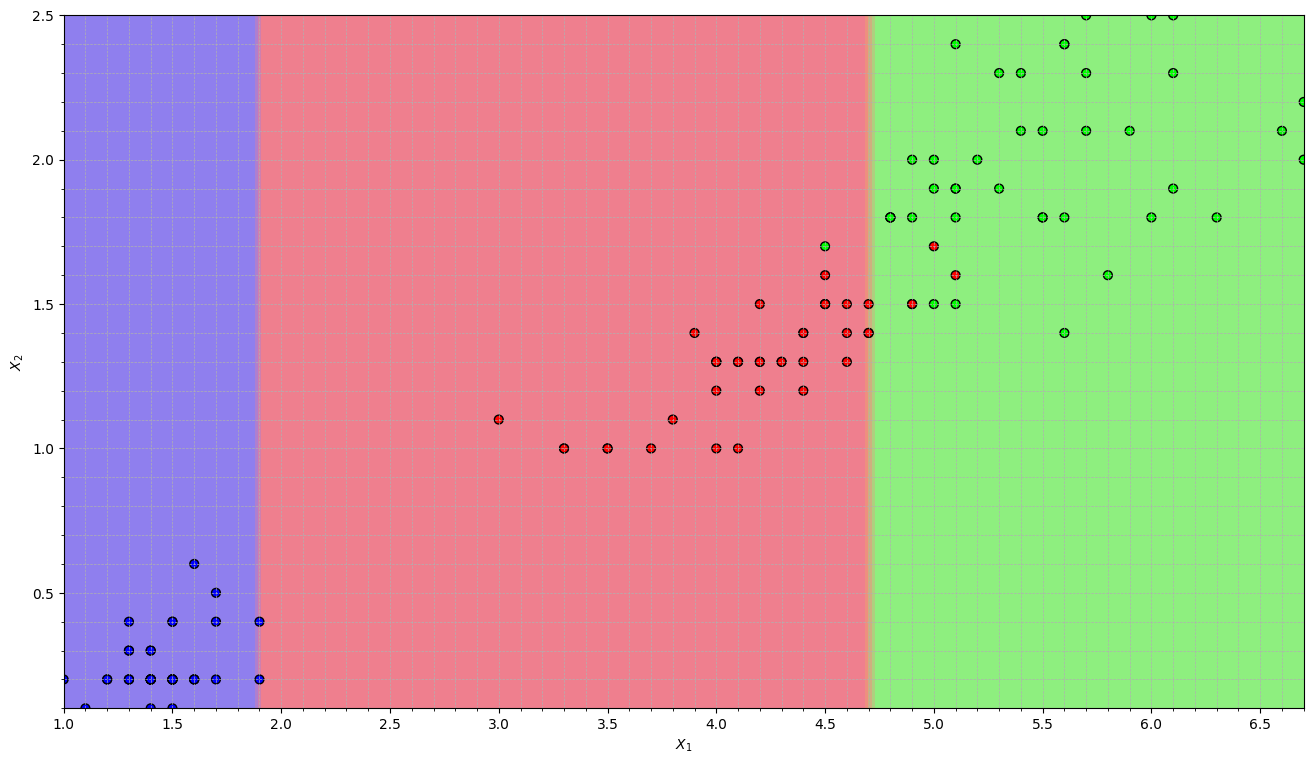

In [54]:
# PLOT
plot1 = Plots()
plot1.plot_decision_boundary(dc_clf, X_train, y_train)


# EXAMPLE 2

In [55]:
# CREATE DATASET - MOONS
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

In [56]:
X

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ...,
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

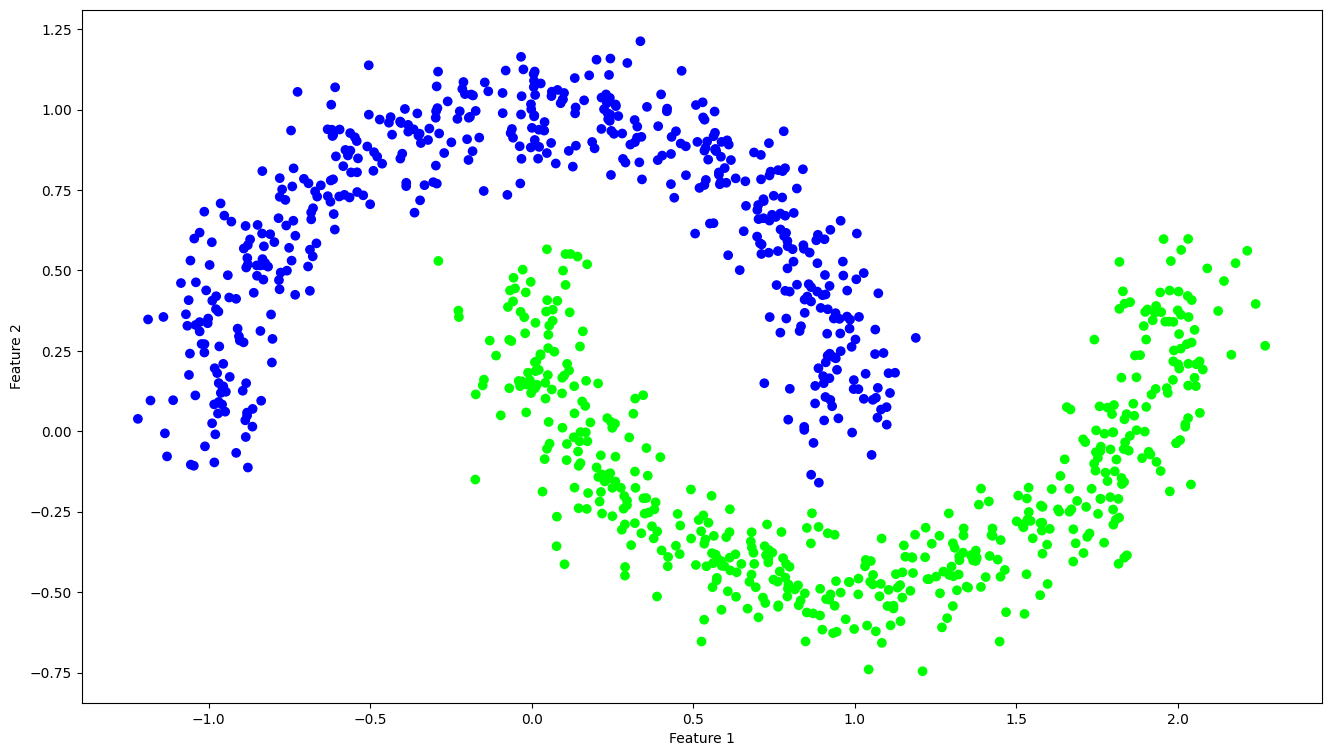

In [57]:
# PLOT DATASET
plt.figure(figsize=(16, 9))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [58]:
# SPLIT DATASET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# TRAIN THE MODEL
dc_clf2 = MyDecisionTreeClassifier(max_depth=5)
dc_clf2.fit(X_train, y_train)


MyDecisionTreeClassifier(max_depth=5)

In [60]:
# PREDICT

y_pred2 = dc_clf2.predict(X_test)


In [61]:
# CROSS VALIDATE
cross_vals = cross_validate(dc_clf2, X_train, y_train, cv=10)
cross_vals["test_score"]

array([1.    , 0.9875, 0.975 , 0.9875, 0.975 , 0.9875, 0.975 , 0.9875,
       0.9625, 0.975 ])

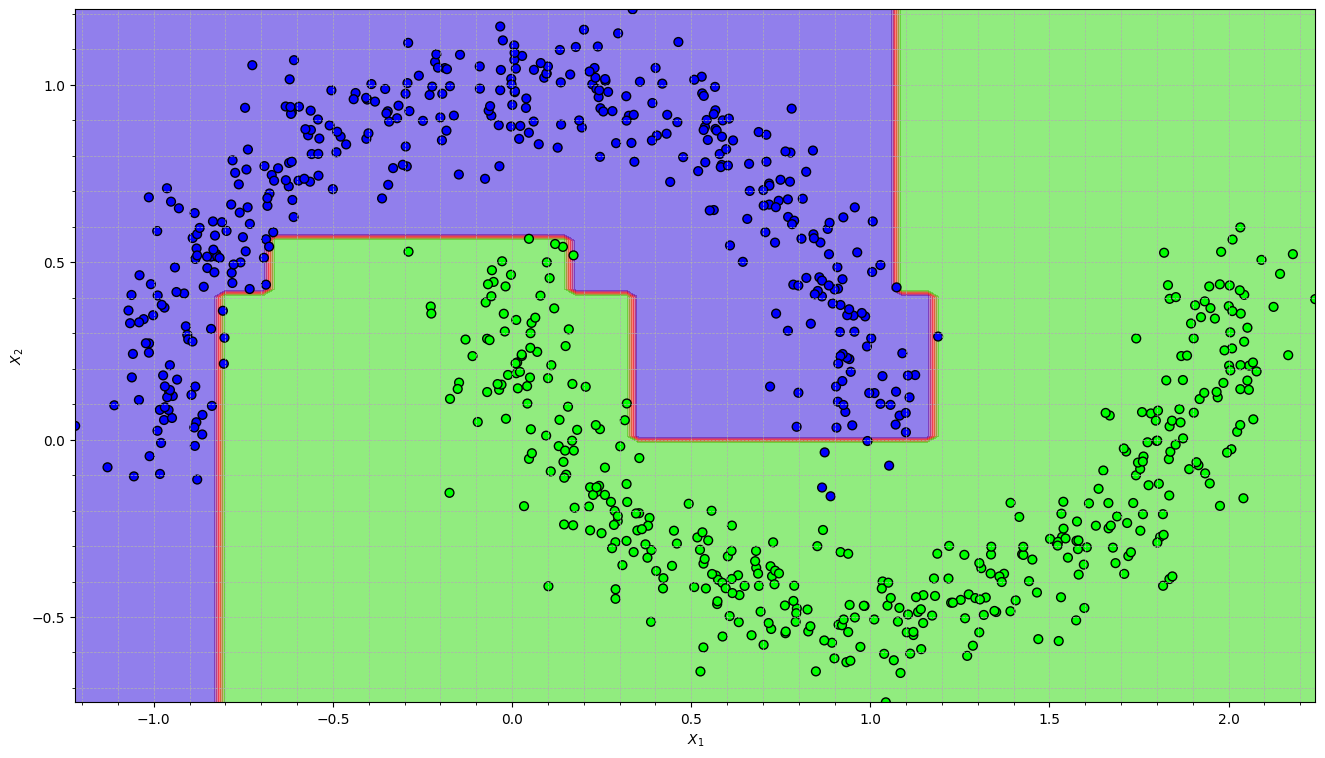

In [62]:
# PLOT
plot2 = Plots()
plot2.plot_decision_boundary(dc_clf2, X_train, y_train)